**PROBLEM STATEMENT**

Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.
Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

In [1]:
#importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#reading dataset
traindf=pd.read_csv("train_v9rqX0R.csv")
traindf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
testdf=pd.read_csv("test_AbJTz2l.csv")
testdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
traindf.shape

(8523, 12)

In [5]:
testdf.shape

(5681, 11)

In [6]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Data Preprocessing

## 1.Data preprocessing on training data set

In [8]:
traindf.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**HEATMAP**

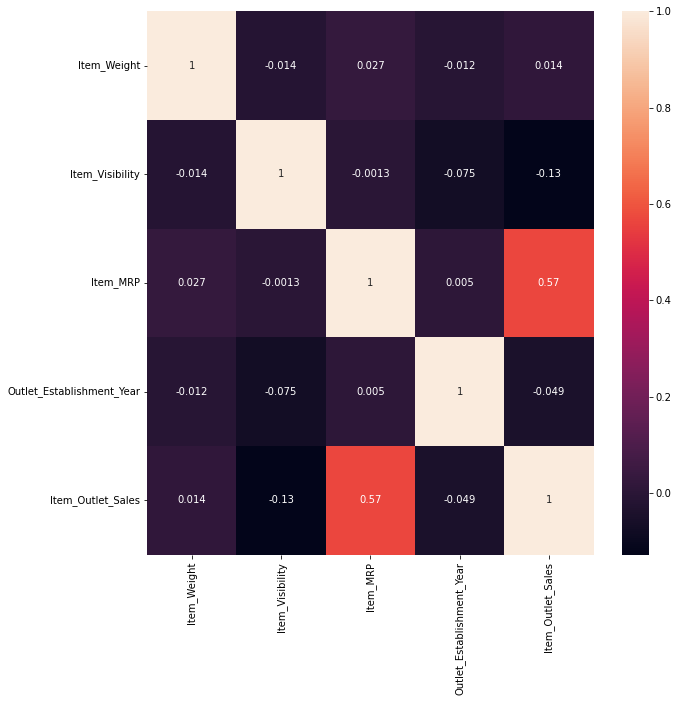

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(traindf.corr(),annot=True)
plt.show()

In [10]:
traindf['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [11]:
traindf.groupby('Item_Type')['Item_Weight'].median()

Item_Type
Baking Goods             11.650
Breads                   10.600
Breakfast                10.695
Canned                   12.150
Dairy                    13.350
Frozen Foods             12.850
Fruits and Vegetables    13.100
Hard Drinks              10.100
Health and Hygiene       12.150
Household                13.150
Meat                     12.350
Others                   14.500
Seafood                  11.650
Snack Foods              13.150
Soft Drinks              11.800
Starchy Foods            13.175
Name: Item_Weight, dtype: float64

In [12]:
traindf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
#handling the missing values in Item__Weight
traindf['Item_Weight'].fillna(traindf.groupby('Item_Type')['Item_Weight'].transform('median'),inplace=True) 

In [14]:
traindf.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df=traindf[['Outlet_Size','Outlet_Location_Type','Outlet_Type']]
df

,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Medium,Tier 1,Supermarket Type1
1,Medium,Tier 3,Supermarket Type2
2,Medium,Tier 1,Supermarket Type1
3,NaN,Tier 3,Grocery Store
4,High,Tier 3,Supermarket Type1
...,...,...,...
8518,High,Tier 3,Supermarket Type1
8519,NaN,Tier 2,Supermarket Type1
8520,Small,Tier 2,Supermarket Type1
8521,Medium,Tier 3,Supermarket Type2


In [16]:
df[df.isnull().any(axis=1)]#to locate the missing values

,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,NaN,Tier 3,Grocery Store
8,NaN,Tier 2,Supermarket Type1
9,NaN,Tier 2,Supermarket Type1
25,NaN,Tier 2,Supermarket Type1
28,NaN,Tier 3,Grocery Store
...,...,...,...
8502,NaN,Tier 2,Supermarket Type1
8508,NaN,Tier 2,Supermarket Type1
8509,NaN,Tier 3,Grocery Store
8514,NaN,Tier 2,Supermarket Type1


We will handle the missing values in the column Outlet_size by features Outlet_Type & Outlet_Location_Type

In [17]:
traindf.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [18]:
traindf.groupby(['Outlet_Location_Type',"Outlet_Type"])['Outlet_Size'].apply(lambda x: x.mode())

Outlet_Location_Type  Outlet_Type         
Tier 1                Grocery Store      0     Small
                      Supermarket Type1  0    Medium
                                         1     Small
Tier 2                Supermarket Type1  0     Small
Tier 3                Supermarket Type1  0      High
                      Supermarket Type2  0    Medium
                      Supermarket Type3  0    Medium
Name: Outlet_Size, dtype: object

In [19]:
traindf.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [20]:
filtered_df1 = traindf.loc[(traindf['Outlet_Size'].isna() &(traindf['Outlet_Type'] == 'Grocery Store') & (traindf['Outlet_Location_Type'] == 'Tier 1'))]
filtered_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [21]:
filtered_df1 = traindf.loc[(traindf['Outlet_Size'].isna() &(traindf['Outlet_Type'] == 'Supermarket Type1') & (traindf['Outlet_Location_Type'] == 'Tier 1'))]
filtered_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [22]:
filtered_df = traindf.loc[(traindf['Outlet_Size'].isna() &(traindf['Outlet_Type'] == 'Supermarket Type1') & (traindf['Outlet_Location_Type'] == 'Tier 2'))]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
33,FDO23,17.85,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.60,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
...,...,...,...,...,...,...,...,...,...,...,...,...
8501,FDW21,5.34,Regular,0.005998,Snack Foods,100.4358,OUT017,2007,NaN,Tier 2,Supermarket Type1,1508.0370
8502,NCH43,8.42,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [23]:
missing_value_indices = filtered_df.index
print(missing_value_indices)

Int64Index([   8,    9,   25,   33,   46,   47,   53,   54,   56,   61,
            ...
            8483, 8493, 8494, 8496, 8500, 8501, 8502, 8508, 8514, 8519],
           dtype='int64', length=1855)


In [24]:
traindf.loc[missing_value_indices] = traindf.loc[missing_value_indices].fillna('Small')

In [25]:
traindf.isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [26]:
filtered_df1 = traindf.loc[(df['Outlet_Size'].isna() &(traindf['Outlet_Type'] == 'Supermarket Type1') & (traindf['Outlet_Location_Type'] == 'Tier 3'))]
filtered_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [27]:
filtered_df1 = traindf.loc[(traindf['Outlet_Size'].isna() &(traindf['Outlet_Type'] == 'Supermarket Type2') & (traindf['Outlet_Location_Type'] == 'Tier 3'))]
filtered_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [28]:
filtered_df1 = traindf.loc[(traindf['Outlet_Size'].isna() &(traindf['Outlet_Type'] == 'Supermarket Type3') & (traindf['Outlet_Location_Type'] == 'Tier 3'))]
filtered_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [29]:
traindf.loc[df.isnull().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,Small,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Small,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Small,Tier 2,Supermarket Type1,468.7232


In [30]:
filtered_df1 = traindf.loc[(traindf['Outlet_Size'].isna() &(traindf['Outlet_Type'] == 'Grocery Store') & (traindf['Outlet_Location_Type'] == 'Tier 3'))]
filtered_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [31]:
missing_value_indices=filtered_df1.index

In [32]:
traindf.loc[missing_value_indices] = traindf.loc[missing_value_indices].fillna('Small')

In [33]:
traindf.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
#checking the presence of the missing values in testing data
testdf.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [35]:
#handlling missing values in Item_Weight in test data
testdf['Item_Weight'].fillna(testdf.groupby('Item_Type')['Item_Weight'].transform('median'),inplace=True) 

In [36]:
testdf.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [37]:
testdf.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          352
                      Supermarket Type1  Medium         620
                                         Small          620
Tier 2                Supermarket Type1  Small          620
Tier 3                Supermarket Type1  High           621
                      Supermarket Type2  Medium         618
                      Supermarket Type3  Medium         624
Name: Outlet_Size, dtype: int64

In [38]:
filtered_df = testdf.loc[(testdf['Outlet_Size'].isna() &(testdf['Outlet_Type'] == 'Grocery Store') & (testdf['Outlet_Location_Type'] == 'Tier 1'))]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [39]:
missing_index=filtered_df.index

In [40]:
testdf.loc[missing_index] = testdf.loc[missing_index].fillna('Small')

In [41]:
filtered_df = testdf.loc[(testdf['Outlet_Size'].isna() &(testdf['Outlet_Type'] == 'Supermarket Type1') & (testdf['Outlet_Location_Type'] == 'Tier 1'))]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [42]:
missing_index=filtered_df.index

In [43]:
testdf.loc[missing_index] = testdf.loc[missing_index].fillna('Medium')

In [44]:
filtered_df = testdf.loc[(testdf['Outlet_Size'].isna() &(testdf['Outlet_Type'] == 'Supermarket Type1') & (testdf['Outlet_Location_Type'] == 'Tier 2'))]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1
10,FDT44,16.600,Low Fat,0.103569,Fruits and Vegetables,118.3466,OUT017,2007,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5662,FDK22,9.800,Low Fat,0.026234,Snack Foods,214.3850,OUT017,2007,NaN,Tier 2,Supermarket Type1
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [45]:
missing_index=filtered_df.index

In [46]:
testdf.loc[missing_index] = testdf.loc[missing_index].fillna('Small')

In [47]:
filtered_df = testdf.loc[(testdf['Outlet_Size'].isna() &(testdf['Outlet_Type'] == 'Supermarket Type1') & (testdf['Outlet_Location_Type'] == 'Tier 3'))]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [48]:
missing_index=filtered_df.index

In [49]:
testdf.loc[missing_index] = testdf.loc[missing_index].fillna('High')

In [50]:
filtered_df = testdf.loc[(testdf['Outlet_Size'].isna() &(testdf['Outlet_Type'] == 'Supermarket Type2') & (testdf['Outlet_Location_Type'] == 'Tier 3'))]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [51]:
missing_index=filtered_df.index

In [52]:
testdf.loc[missing_index] = testdf.loc[missing_index].fillna('Medium')

In [53]:
filtered_df = testdf.loc[(testdf['Outlet_Size'].isna() &(testdf['Outlet_Type'] == 'Supermarket Type3') & (testdf['Outlet_Location_Type'] == 'Tier 3'))]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [54]:
testdf.isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  370
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [55]:
import statistics

In [56]:
mode_size=df.groupby(['Outlet_Location_Type',"Outlet_Type"])['Outlet_Size'].agg(lambda x: statistics.mode(x) if len(x)>0 else "Unknown")

In [57]:
print(mode_size)

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store         Small
                      Supermarket Type1    Medium
Tier 2                Supermarket Type1       NaN
Tier 3                Grocery Store           NaN
                      Supermarket Type1      High
                      Supermarket Type2    Medium
                      Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [58]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [59]:
filtered_df = testdf.loc[(testdf['Outlet_Size'].isna() &(testdf['Outlet_Type'] == 'Grocery Store') & (testdf['Outlet_Location_Type'] == 'Tier 3'))]
filtered_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
19,FDA46,13.600,Low Fat,0.196898,Snack Foods,193.7136,OUT010,1998,NaN,Tier 3,Grocery Store
25,FDX22,6.785,Regular,0.038455,Snack Foods,209.4928,OUT010,1998,NaN,Tier 3,Grocery Store
37,FDD48,10.395,Low Fat,0.050479,Baking Goods,114.0176,OUT010,1998,NaN,Tier 3,Grocery Store
41,FDY19,19.750,LF,0.069236,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5571,FDI15,13.800,Low Fat,0.236595,Dairy,265.0884,OUT010,1998,NaN,Tier 3,Grocery Store
5572,NCH43,8.420,Low Fat,0.118118,Household,216.9192,OUT010,1998,NaN,Tier 3,Grocery Store
5580,FDA23,9.800,Low Fat,0.078981,Baking Goods,100.1016,OUT010,1998,NaN,Tier 3,Grocery Store
5650,FDC10,9.800,Regular,0.121982,Snack Foods,119.7098,OUT010,1998,NaN,Tier 3,Grocery Store


In [60]:
missing_index=filtered_df.index

In [61]:
testdf.loc[missing_index] = testdf.loc[missing_index].fillna('Small')

In [62]:
testdf.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

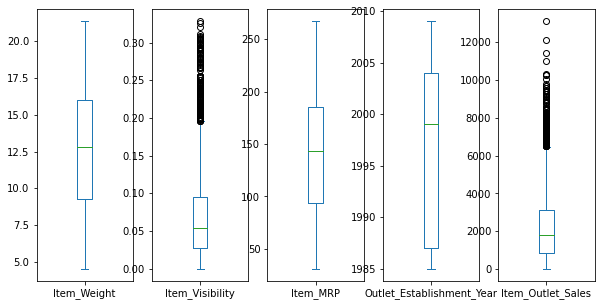

In [63]:
#checking for outliers in training data
traindf.plot(kind='box',figsize=(10,5),subplots=True)
plt.show()

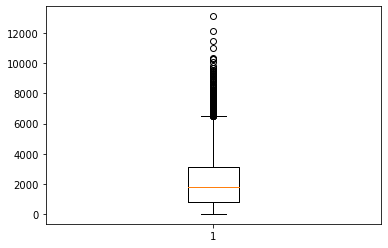

In [64]:
plt.boxplot(traindf['Item_Outlet_Sales'])
plt.show()

In [65]:
Q1=np.percentile(traindf['Item_Outlet_Sales'],25,interpolation='midpoint')
Q2=np.percentile(traindf['Item_Outlet_Sales'],50,interpolation="midpoint")
Q3=np.percentile(traindf['Item_Outlet_Sales'],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

834.2474
1794.331
3101.2964
-2566.3261
6501.8699


In [66]:
outlier=[]

for i in traindf['Item_Outlet_Sales']:
    if i<low_lim or i>up_lim:
        outlier.append(i)
        
len(outlier)

186

In [67]:
outlier

[6768.5228,
 7968.2944,
 6976.2524,
 7370.406,
 6704.606,
 6795.1548,
 7222.5984,
 7298.4996,
 7452.9652,
 7696.648,
 9267.936,
 7763.228,
 6911.004,
 6687.961,
 9158.079,
 8114.7704,
 7094.7648,
 7192.6374,
 6611.394,
 7443.644,
 7488.9184,
 7833.8028,
 7759.899,
 6515.5188,
 7017.532,
 7370.406,
 9133.4444,
 9275.9256,
 10236.675,
 6622.7126,
 7152.0236,
 7296.5022,
 6767.1912,
 6872.3876,
 7472.2734,
 8132.0812,
 6897.688,
 11445.102,
 7646.0472,
 6668.6528,
 6574.775,
 6942.9624,
 7073.4592,
 7130.718,
 6771.186,
 7116.0704,
 6524.84,
 6769.8544,
 6692.6216,
 6615.3888,
 7504.2318,
 7086.1094,
 7168.6686,
 6751.212,
 8239.9408,
 9371.8008,
 8851.1452,
 7478.2656,
 8604.7992,
 7590.12,
 6503.5344,
 8760.5964,
 6796.4864,
 7201.2928,
 6852.4136,
 6729.9064,
 7931.6754,
 6729.9064,
 7142.7024,
 6893.0274,
 7534.1928,
 7843.124,
 9467.676,
 8912.3988,
 6757.87,
 7247.233,
 7503.566,
 7247.233,
 8138.7392,
 7033.5112,
 7334.4528,
 6972.2576,
 6851.082,
 6641.355,
 7350.432,
 6507.5292,


In [68]:
traindf.loc[traindf['Item_Outlet_Sales'].isin(outlier)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.35,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
130,FDY25,12.15,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.2944
132,NCR53,12.15,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.2524
145,FDP16,18.60,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.4060
203,FDI24,11.65,Low Fat,0.078362,Baking Goods,177.9370,OUT027,1985,Medium,Tier 3,Supermarket Type3,6704.6060
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,FDU55,16.20,Low Fat,0.035967,Fruits and Vegetables,260.3278,OUT049,1999,Medium,Tier 1,Supermarket Type1,7549.5062
8329,NCQ06,13.15,Low Fat,0.041622,Household,253.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6630.0364
8350,NCE18,10.00,Low Fat,0.021421,Household,248.3750,OUT035,2004,Small,Tier 2,Supermarket Type1,7240.5750
8447,FDS26,20.35,Low Fat,0.089975,Dairy,261.6594,OUT017,2007,Small,Tier 2,Supermarket Type1,7588.1226


We will not deal with the outliers in the column Item_Outlet_Sales since many factors affect the sales

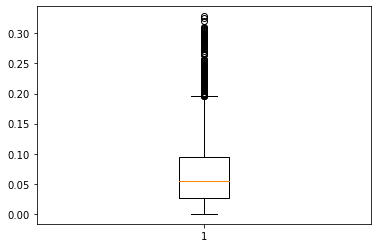

In [69]:
plt.boxplot(traindf['Item_Visibility'])
plt.show()

In [70]:
Q1=np.percentile(traindf['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(traindf['Item_Visibility'],50,interpolation="midpoint")
Q3=np.percentile(traindf['Item_Visibility'],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.0269894775
0.053930934
0.0945852925
-0.07440424500000001
0.195979015


In [71]:
outlier=[]

for i in traindf['Item_Visibility']:
    if i<low_lim or i>up_lim:
        outlier.append(i)
        
len(outlier)

144

Text(0.5, 1.0, 'Box plot of lead time')

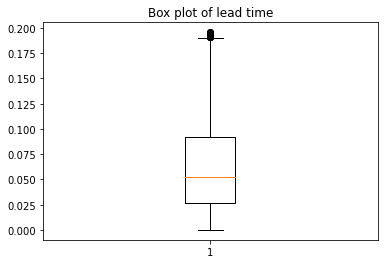

In [72]:
#Removing the outliers
ind1=traindf['Item_Visibility']>up_lim
traindf.loc[ind1].index
traindf.drop(traindf.loc[ind1].index,inplace=True)
plt.boxplot(traindf['Item_Visibility'])
plt.title('Box plot of lead time')

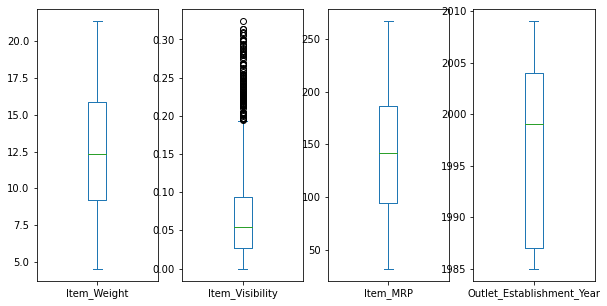

In [73]:
#checking for outliers in testing data
testdf.plot(kind='box',figsize=(10,5),subplots=True)
plt.show()

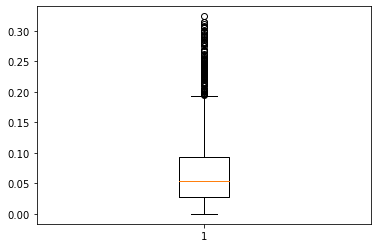

In [74]:
#handling the outliers in the column Item_Visibility
plt.boxplot(testdf['Item_Visibility'])
plt.show()

In [75]:
Q1=np.percentile(testdf['Item_Visibility'],25,interpolation='midpoint')
Q2=np.percentile(testdf['Item_Visibility'],50,interpolation="midpoint")
Q3=np.percentile(testdf['Item_Visibility'],75,interpolation="midpoint")
print(Q1)
print(Q2)
print(Q3)

#finding IQR
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

0.027046875
0.054154252
0.093462623
-0.072576747
0.193086245


In [76]:
outlier=[]

for i in testdf['Item_Visibility']:
    if i<low_lim or i>up_lim:
        outlier.append(i)
        
len(outlier)

113

Text(0.5, 1.0, 'Box plot of lead time')

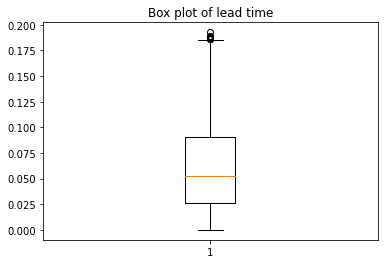

In [77]:
#Removing the outliers
ind1=testdf['Item_Visibility']>up_lim
testdf.loc[ind1].index
testdf.drop(testdf.loc[ind1].index,inplace=True)
plt.boxplot(testdf['Item_Visibility'])
plt.title('Box plot of lead time')

In [78]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8379 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8379 non-null   object 
 1   Item_Weight                8379 non-null   float64
 2   Item_Fat_Content           8379 non-null   object 
 3   Item_Visibility            8379 non-null   float64
 4   Item_Type                  8379 non-null   object 
 5   Item_MRP                   8379 non-null   float64
 6   Outlet_Identifier          8379 non-null   object 
 7   Outlet_Establishment_Year  8379 non-null   int64  
 8   Outlet_Size                8379 non-null   object 
 9   Outlet_Location_Type       8379 non-null   object 
 10  Outlet_Type                8379 non-null   object 
 11  Item_Outlet_Sales          8379 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 851.0+ KB


## Encoding

In [79]:
traindf['Item_Fat_Content'].nunique()

5

In [80]:
traindf['Item_Type'].nunique()

16

In [81]:
traindf['Outlet_Identifier'].nunique()

10

In [82]:
traindf['Outlet_Size'].nunique()

3

In [83]:
traindf['Outlet_Location_Type'].nunique()

3

In [84]:
traindf['Outlet_Type'].nunique()

4

In [85]:
#encoding the training dataset
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()
for i in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier']:
    traindf[i]=le.fit_transform(traindf[i])

In [87]:
for i in ['Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    traindf=pd.get_dummies(traindf,columns=[i])

In [88]:
#encoding the testing dataset
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5568 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5568 non-null   object 
 1   Item_Weight                5568 non-null   float64
 2   Item_Fat_Content           5568 non-null   object 
 3   Item_Visibility            5568 non-null   float64
 4   Item_Type                  5568 non-null   object 
 5   Item_MRP                   5568 non-null   float64
 6   Outlet_Identifier          5568 non-null   object 
 7   Outlet_Establishment_Year  5568 non-null   int64  
 8   Outlet_Size                5568 non-null   object 
 9   Outlet_Location_Type       5568 non-null   object 
 10  Outlet_Type                5568 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 522.0+ KB


In [89]:
le=LabelEncoder()
for i in ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier']:
    testdf[i]=le.fit_transform(testdf[i])

In [90]:
for i in ['Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    testdf=pd.get_dummies(testdf,columns=[i])

In [91]:
# Splitting training dataset into x and y
y = traindf['Item_Outlet_Sales']
X = traindf.drop('Item_Outlet_Sales', axis = 1)

## Modelling

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [98]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

1.Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print('MSE is :',mean_squared_error(y_test,predictions))
print('MAE is :',mean_absolute_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE is : 1252846.2228118165
MAE is : 817.6569489612504
R squared value is : 0.5575834653470779


2.Decision Tree

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
dr = DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions=dr.predict(X_test)
print('MSE is :',mean_squared_error(y_test,predictions))
print('MAE is :',mean_absolute_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE is : 2372749.3456595526
MAE is : 1071.254720763723
R squared value is : 0.16211301595282535


We will use linear regression model to predict the Item_Outlet_Sales

In [103]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
test_pred=model.predict(testdf)

In [104]:
test_pred

array([1879.90744308, 1591.14180658, 1930.51096461, ..., 1805.31225321,
       3574.99247339, 1181.23273663])

In [105]:
testdf['Item_Outlet_Sales']=test_pred

In [106]:
testdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,1101,20.750,1,0.007565,13,107.8622,9,1999,0,1,0,1,0,0,0,1,0,0,1879.907443
1,1065,8.300,4,0.038428,4,87.3198,2,2007,0,0,1,0,1,0,0,1,0,0,1591.141807
2,1404,14.600,1,0.099575,11,241.7538,0,1998,0,0,1,0,0,1,1,0,0,0,1930.510965
3,808,7.315,1,0.015388,13,155.0340,2,2007,0,0,1,0,1,0,0,1,0,0,2626.577277
4,1182,12.800,2,0.118599,4,234.2300,5,1985,0,1,0,0,0,1,0,0,0,1,5177.621930
